## Testing and Debugging the BPASS isochrone at 10^9.3 years age. (Non Solar Metallicity)
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 10^9.3 years age, a tenth of solar metallicity, AKs=0.0, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the current-mass luminosity relationship of the cluster.

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101. This is since we haven't added neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged.

**I will be using the Kennicutt IMF and a slightly different age. I also use the Parsec evolution model for the sake of comparison with the BPASS isochrone and to distinguish this notebook from the others.**

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(9.3, 0.0, 1000,math.log10(1), mass_sampling=1, filepath='/g/lu/scratch/ryotainagaki/BPASS_iso_filesTimedIsolated/')

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1771: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=5.00 for T= 30069 logg=7.94
Changing to logg=5.00 for T= 24315 logg=5.89
Changing to logg=5.00 for T= 22265 logg=5.67
Changing to logg=5.00 for T= 20350 logg=5.50
Changing to logg=5.00 for T= 18839 logg=5.32
Changing to logg=5.00 for T= 18814 logg=5.31
Changing to logg=5.00 for T= 16727 logg=5.17
Changing to logg=5.00 for T= 21102 logg=5.55
Changing to logg=5.00 for T= 18856 logg=5.34
Changing to logg=5.00 for T= 23483 logg=5.75
Changing to logg=5.00 for T= 22703 logg=5.55
Changing to logg=5.00 for T= 20581 logg=5.50
Changing to logg=5.00 for T= 17282 logg=5.28
Changing to logg=5.00 for T= 20029 logg=5.46
Changing to logg=5.00 for T= 24947 logg=5.84
Changing to logg=5.00 for T= 23502 logg=5.75
Changing to logg=5.00 for T= 16162 logg=5.12
Changing to logg=5.00 for T= 24334 logg=5.91
Changing to logg=5.00 for T= 20568 logg=5.50
Changing to T=  1200 for T=   808 logg=4.44
Changing to T=  1200 for T=   808 logg=4.44
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to 

M =   3.300 Msun  T =  8113 K  m_ubv_U = 22.94
Primaries
M =   2.300 Msun  T =  8212 K  m_ubv_U = 22.53
M =   0.251 Msun  T =   nan K  m_ubv_U =  nan
M =   1.259 Msun  T =   nan K  m_ubv_U =  nan
M =   0.794 Msun  T =   nan K  m_ubv_U =  nan
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   3.000 Msun  T =  7674 K  m_ubv_U = 23.06
M =   1.500 Msun  T =  6363 K  m_ubv_U = 13.19
M =   3.000 Msun  T =  7674 K  m_ubv_U = 23.06
M =   3.700 Msun  T =  8766 K  m_ubv_U = 22.82
M =   3.700 Msun  T =  8727 K  m_ubv_U = 22.82
M =   0.631 Msun  T =   nan K  m_ubv_U =  nan
M =   1.700 Msun  T =  4918 K  m_ubv_U = 13.33
M =   3.000 Msun  T =  7674 K  m_ubv_U = 23.06
M =   1.400 Msun  T =  6410 K  m_ubv_U = 13.56
M =   4.500 Msun  T =  8592 K  m_ubv_U = 23.07
M =   3.000 Msun  T =  7660 K  m_ubv_U = 23.06
M =   3.200 Msun  T = 11299 K  m_ubv_U = 22.91
M =   1.700 Msun  T =  4918 K  m_ubv_U = 13.33
M =   0.794 Msun  T =   nan K  m_ubv_U =  nan
M =   2.700 Msun  T =  7896 K  m_ubv_U = 22.80
M =   7.0

M =   0.840 Msun  T =   nan K  m_ubv_V =  nan
M =   1.500 Msun  T =  6379 K  m_ubv_V = 12.72
Starting filter: ubv,B   Elapsed time: 35.05 seconds
Starting synthetic photometry
Singles
M =   1.660 Msun  T =  6033 K  m_ubv_B = 12.80
M =   3.300 Msun  T =  8113 K  m_ubv_B = 23.53
Primaries
M =   2.300 Msun  T =  8212 K  m_ubv_B = 23.10
M =   0.251 Msun  T =   nan K  m_ubv_B =  nan
M =   1.259 Msun  T =   nan K  m_ubv_B =  nan
M =   0.794 Msun  T =   nan K  m_ubv_B =  nan
M =   1.400 Msun  T =   nan K  m_ubv_B =  nan
M =   3.000 Msun  T =  7674 K  m_ubv_B = 23.62
M =   1.500 Msun  T =  6363 K  m_ubv_B = 13.21
M =   3.000 Msun  T =  7674 K  m_ubv_B = 23.62
M =   3.700 Msun  T =  8766 K  m_ubv_B = 23.42
M =   3.700 Msun  T =  8727 K  m_ubv_B = 23.43
M =   0.631 Msun  T =   nan K  m_ubv_B =  nan
M =   1.700 Msun  T =  4918 K  m_ubv_B = 12.68
M =   3.000 Msun  T =  7674 K  m_ubv_B = 23.62
M =   1.400 Msun  T =  6410 K  m_ubv_B = 13.59
M =   4.500 Msun  T =  8592 K  m_ubv_B = 23.68
M =   3.000 

M =   3.500 Msun  T = 10599 K  m_ubv_R = 8.69
M =   1.480 Msun  T =  7013 K  m_ubv_R = 12.87
M =   1.650 Msun  T =  6302 K  m_ubv_R = 11.90
M =   1.800 Msun  T =  6739 K  m_ubv_R = 11.08
M =   0.840 Msun  T =   nan K  m_ubv_R =  nan
M =   1.500 Msun  T =  6379 K  m_ubv_R = 12.46
Starting filter: ubv,I   Elapsed time: 68.91 seconds
Starting synthetic photometry
Singles
M =   1.660 Msun  T =  6033 K  m_ubv_I = 11.52
M =   3.300 Msun  T =  8113 K  m_ubv_I = 22.89
Primaries
M =   2.300 Msun  T =  8212 K  m_ubv_I = 22.49
M =   0.251 Msun  T =   nan K  m_ubv_I =  nan
M =   1.259 Msun  T =   nan K  m_ubv_I =  nan
M =   0.794 Msun  T =   nan K  m_ubv_I =  nan
M =   1.400 Msun  T =   nan K  m_ubv_I =  nan
M =   3.000 Msun  T =  7674 K  m_ubv_I = 22.89
M =   1.500 Msun  T =  6363 K  m_ubv_I = 12.11
M =   3.000 Msun  T =  7674 K  m_ubv_I = 22.89
M =   3.700 Msun  T =  8766 K  m_ubv_I = 22.90
M =   3.700 Msun  T =  8727 K  m_ubv_I = 22.90
M =   0.631 Msun  T =   nan K  m_ubv_I =  nan
M =   1.700 M

As a sanity check, I would like to make sure that, for primary stars, we only have (from the isochrone) designated phase 5 stars ( anything that is not a compact remnant), white dwarves (models with phase 101), and non-white dwarf compact remnants that are  NEWSECMODS primaries (models with phase 110). Also make sure that our secondary stars are non-compact-remnant, white dwarves, or are merged.

In [2]:
import numpy as np
np.all([(x==5 or x==101 or x==110) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x==5 or x==101) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x==5 or x==101 or x==-99) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries, single stars, and secondaries. 

In [5]:
import numpy as np
np.max(iso1.singles['logg'])

9.294869501162154

In [6]:
import numpy as np
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

9.288600394549206

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg']))

9.283702439639246

In [8]:
np.mean(iso1.singles['logg'])

6.451972664367584

In [9]:
np.mean((np.nan_to_num(iso1.secondaries['logg'])))

4.464233064697966

In [10]:
np.mean((np.nan_to_num(iso1.primaries['logg'])))

4.969809245439517

In [11]:
np.median(iso1.singles['logg'])

7.9322176580477315

In [12]:
np.median(iso1.primaries['logg'])

nan

In [13]:
iso1.primaries['logg']

7.935611004110614
8.427172319392993
3.8041676099590584
8.554753450326157
3.9606588863588144
8.411199811721845
8.359929254625847
4.0995356629813715
4.0995356629813715
3.7969076099590584
nan


Text(0.5, 0, 'logg in cgs')

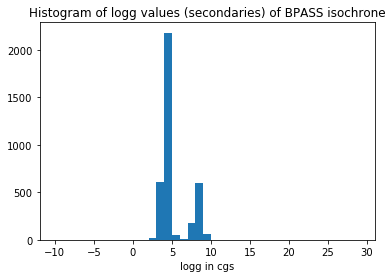

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

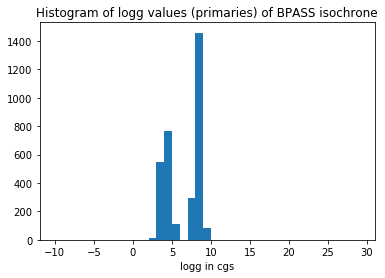

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

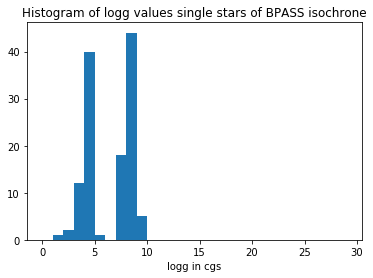

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of BPASS isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

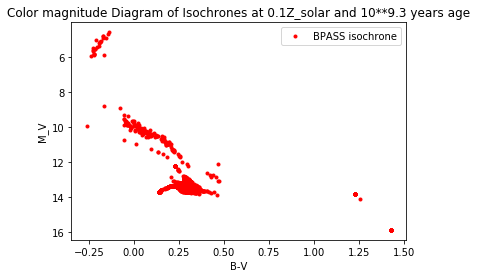

In [17]:
import matplotlib.pyplot as plt
indices1= np.where(iso1.singles['logg']>5)[0]
indices2= np.where(iso1.primaries['logg']>5)[0]
indices3= np.where(iso1.secondaries['logg']>5)[0]
plt.plot(iso1.primaries['m_ubv_B'][indices2]-iso1.primaries["m_ubv_V"][indices2], iso1.primaries["m_ubv_V"][indices2]-5*np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B'][indices3]-iso1.secondaries["m_ubv_V"][indices3], iso1.secondaries["m_ubv_V"][indices3]-5*np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B'][indices1]-iso1.singles["m_ubv_V"][indices1], iso1.singles["m_ubv_V"][indices1]-5*np.log10(100), "r.", label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**9.3 years age")
plt.gca().invert_yaxis()
plt.legend()

In [18]:
indices2= np.where((iso1.primaries['logg']>5) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']>-0.4) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']<-0.2))[0]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [19]:
np.unique(iso1.primaries[indices2]['phase'])

5.0


In [20]:
indices2= np.where((iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']>1.2) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']<1.5))[0]

In [21]:
indices2

array([ 366,  822,  938, 1859, 1862, 2552, 2609, 2799, 3062, 3478, 3998])

In [22]:
np.unique(iso1.primaries['phase'][indices2])

5.0


In [23]:
iso1.primaries[indices2]

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
1.3,4.426820669893006e+28,4453.074900454848,12569417859.54888,2.1532565486814073,False,1.7,5.0,1,12.603484684052491,10.178792330817375,11.415650713000225,9.594408386337824,8.861021886360154
0.9,4.426820669893006e+28,4453.074900454848,12569417859.54888,2.1532565486814073,False,1.7,5.0,1,12.603484684052491,10.178792330817375,11.415650713000225,9.594408386337824,8.861021886360154
1.1,4.426820669893006e+28,4453.074900454848,12569417859.54888,2.1532565486814073,False,1.7,5.0,1,12.603484684052491,10.178792330817375,11.415650713000225,9.594408386337824,8.861021886360154
1.1,4.426820669893006e+28,4453.074900454848,12569417859.54888,2.1532565486814073,False,1.7,5.0,1,12.603484684052491,10.178792330817375,11.415650713000225,9.594408386337824,8.861021886360154
1.1,4.426820669893006e+28,4453.074900454848,12569417859.54888,2.1532565486814073,False,1.7,5.0,1,12.603484684052491,10.178792330817375,11.415650713000225,9.594408386337824,8.861021886360154
1.3,4.426820669893006e+28,4453.074900454848,12569417859.54888,2.1532565486814073,False,1.7,5.0,1,12.603484684052491,10.178792330817375,11.415650713000225,9.594408386337824,8.861021886360154
1.7,5.137974317717312e+28,4404.940028070771,13839014495.427975,2.0696965486814074,False,1.7,5.0,1,12.566845904795212,10.054372135766837,11.315487387589657,9.456787190032548,8.706427674755046
1.3,4.426820669893006e+28,4453.074900454848,12569417859.54888,2.1532565486814073,False,1.7,5.0,1,12.603484684052491,10.178792330817375,11.415650713000225,9.594408386337824,8.861021886360154


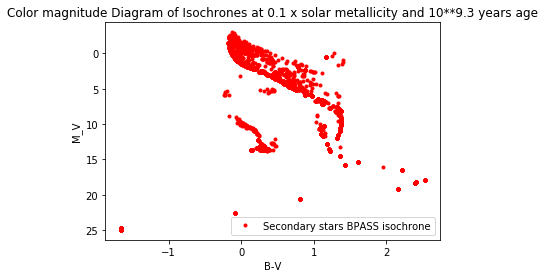

In [24]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r.", label="Secondary stars BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1 x solar metallicity and 10**9.3 years age")
plt.gca().invert_yaxis()
plt.legend()

In [25]:
iso1.secondaries[np.where((iso1.secondaries['m_ubv_V']>30) & ((iso1.secondaries['m_ubv_B']-iso1.secondaries['m_ubv_V'])<-1))[0]]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64
0.13999999999999999,-0.44575340868802926,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.13999999999999999,0.0875795913119708,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.13999999999999999,-0.3124204086880291,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.16000000000000003,-1.0930894086880292,4.013949729509597e+22,923.2727122989376,278280005.5567242,4.438067609959059,False,0.16,5.0,False,1,36.32996977715265,34.75799601291953,33.095349974125234,30.25452124804787,24.347567583369095
0.13999999999999999,-0.5790864086880292,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.13,0.8768515913119708,1.4213202025222475e+22,750.153258350221,250837234.12939957,4.43807097960997,False,0.13,5.0,False,1,36.55541457845449,34.98344333961485,33.32079586292777,30.479969895510337,24.573017828153834
0.13,-1.6564815086880293,1.4213202025222475e+22,750.153258350221,250837234.12939957,4.43807097960997,False,0.13,5.0,False,1,36.55541457845449,34.98344333961485,33.32079586292777,30.479969895510337,24.573017828153834
0.13,-0.4564814086880291,1.4213202025222475e+22,750.153258350221,250837234.12939957,4.43807097960997,False,0.13,5.0,False,1,36.55541457845449,34.98344333961485,33.32079586292777,30.479969895510337,24.573017828153834


Hmm, I think those are stars that are going to be white dwarves very soon or may unintentionally be brown dwarves. At least according to HOKI's criterion for what is a white dwarf or not. At the very least, at least the stars we just saw were low mass stars so they should be **LOW** on the CMD

In [26]:
iso2=synthetic.IsochronePhot(9.3, 0.0, 1000, math.log(1),evo_model=evolution.Parsec(), recomp=True) # New Parsec isochrone for same metallicity

Changing to logg=5.00 for T=  2305 logg=5.22
Isochrone generation took 16.284330 s.
Making photometry for isochrone: log(t) = 9.30  AKs = 0.00  dist = 1000
     Starting at:  2020-12-21 00:31:02.739510   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2305 K  m_ubv_U = 32.04
M =   1.659 Msun  T =  4758 K  m_ubv_U = 13.02
M =   1.710 Msun  T =  4556 K  m_ubv_U = 12.36
Starting filter: ubv,B   Elapsed time: 0.46 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2305 K  m_ubv_B = 32.12
M =   1.659 Msun  T =  4758 K  m_ubv_B = 12.19
M =   1.710 Msun  T =  4556 K  m_ubv_B = 11.28
Starting filter: ubv,V   Elapsed time: 0.92 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2305 K  m_ubv_V = 29.85
M =   1.659 Msun  T =  4758 K  m_ubv_V = 11.11
M =   1.710 Msun  T =  4556 K  m_ubv_V = 10.08
Starting filter: ubv,R   Elapsed time: 1.38 seconds
Starting synthetic photometry
M =   0.090 Msun  T 

Looking at the distribution of logg values. for the stars in the Parsec isochrone.

In [27]:
np.max(iso2.points['logg'])

5.2171

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19., 37., 89.,
        38., 49.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29]),
 <a list of 39 Patch objects>)

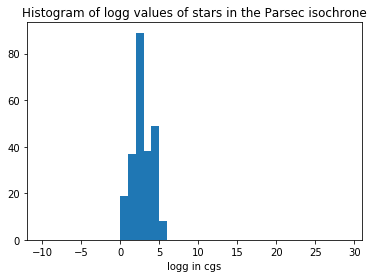

In [28]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the Parsec isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))

In [29]:
np.median(iso2.points['logg'])

2.6134

In [30]:
np.mean(iso2.points['logg'])

2.8664904166666663

In [31]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the Parsec isochrone

In [32]:
clus_1=synthetic.Binary_Cluster(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 20000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 20000, ifmr=ifmr.IFMR_Spera15())

7917.362936000032


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Found 577 companions out of stellar mass range


Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence and perhaps the M type

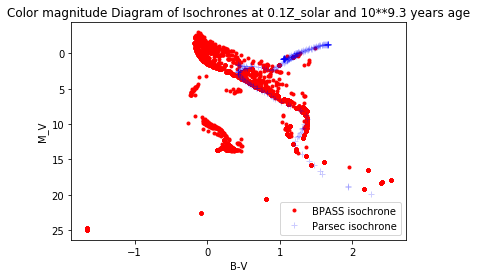

In [33]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B']-iso1.singles["m_ubv_V"], iso1.singles["m_ubv_V"]-5*np.log10(100), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"], iso2.points["m_ubv_V"]-5*np.log10(100), "b+", label="Parsec isochrone", alpha = 0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**9.3 years age")
plt.gca().invert_yaxis()
plt.legend()

We do have several outliers but otherwise the pattern does not seem too terribly off from the Parsec isochrone's shape. Now I look at the primary stars and see if there are any problems caused.

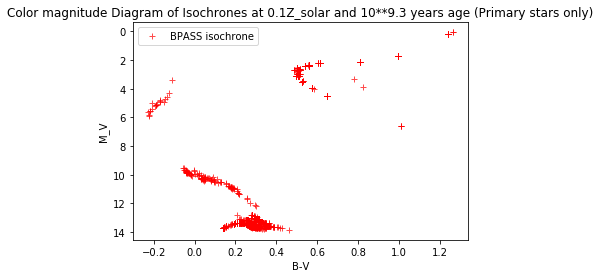

In [34]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r+",  label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**9.3 years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

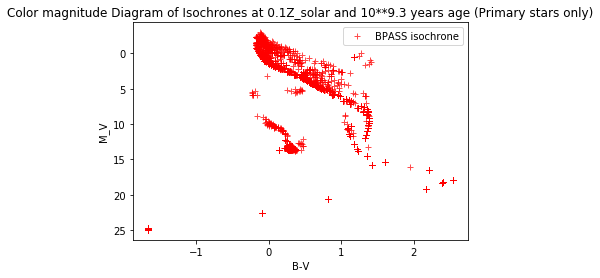

In [35]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r+",  label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**9.3 years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

Where are some of the goofy outliers coming from?

In [36]:
iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"]-5*np.log10(100)>20.0)[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64
0.13999999999999999,-0.44575340868802926,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.13999999999999999,0.0875795913119708,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.22999999999999998,0.6976315913119708,2.463836751915467e+23,1327.2110840755804,333642989.08683115,4.438075463320726,False,0.23,5.0,False,1,35.30175910789871,32.53375408345714,32.44397896932759,28.323385276329212,23.538861868398694
0.13999999999999999,-0.3124204086880291,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.16000000000000003,-1.0930894086880292,4.013949729509597e+22,923.2727122989376,278280005.5567242,4.438067609959059,False,0.16,5.0,False,1,36.32996977715265,34.75799601291953,33.095349974125234,30.25452124804787,24.347567583369095
0.13999999999999999,-0.5790864086880292,2.0587894263296398e+22,807.8672449883936,260304696.1995721,4.438075662981372,False,0.14,5.0,False,1,36.47495735298941,34.902989624084036,33.24034014893007,30.399518015663926,24.492568168372504
0.26,-1.243885408688029,4.548224875119761e+23,1500.3065316795803,354741504.31379926,4.4380609752739515,False,0.26,5.0,False,1,34.026159664130724,30.633704940867208,31.44845488302193,26.952418336027847,22.967821403177684
0.13,0.8768515913119708,1.4213202025222475e+22,750.153258350221,250837234.12939957,4.43807097960997,False,0.13,5.0,False,1,36.55541457845449,34.98344333961485,33.32079586292777,30.479969895510337,24.573017828153834


In [37]:
issue = iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"]-5*np.log10(100)>20.0)[0]]

In [38]:
np.unique(issue['mass'])

0.13
0.13999999999999999
0.16000000000000003
0.22999999999999998
0.26


In [39]:
np.unique(issue['phase'])

5.0


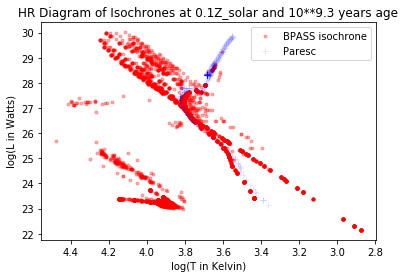

In [40]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.", label="BPASS isochrone", alpha =0.3)
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b+", label="Paresc", alpha =0.1)
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at 0.1Z_solar and 10**9.3 years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

A good sign here is that there are plenty of compact remnant (that means good number of stars have gone through their main-sequence and post-main sequence). I also notice stars turning to the red giant branch. This is going to be really important when we decide to use the clusters as reference for finding ages of actual star clusters.

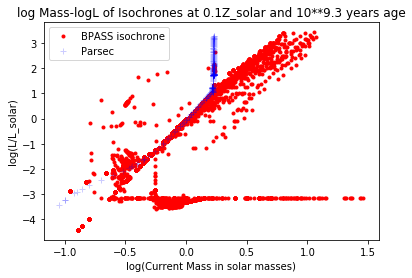

In [41]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"]/cs.L_sun), "b+", label="Parsec", alpha =0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**9.3 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Which table is causing that line segment at around log10(L/L_sun)=-3?
Let's find out.
First I take a look at the shape of the primary stars' plot for log current mass log L.

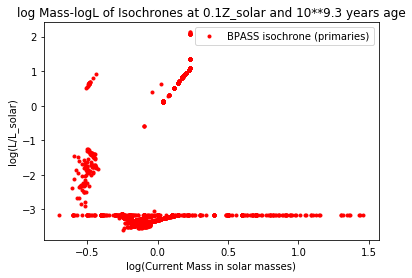

In [42]:
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.", label="BPASS isochrone (primaries)")
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**9.3 years age")
plt.legend()

Which type of secondary star is it that is causing this strange pattern?

In [43]:
bad_line = iso1.primaries[np.where((np.log10(iso1.primaries["L"]/cs.L_sun)>-3.30) & (np.log10(iso1.primaries["L"]/cs.L_sun)<-3.10))[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [44]:
bad_line

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
2.3,2.7911998243170328e+23,8212.228030432203,9280313.858409746,7.935611004110614,False,0.55953,101.0,1,22.534250581653446,22.821818411469724,23.101826745353883,22.67412636705656,22.485062932815868
3.7,2.1055711874413175e+23,8726.920104665855,7137599.3150678,8.321324878972979,False,0.80448,101.0,1,22.823277010210692,23.170791588677137,23.42542961156839,23.049465735069553,22.898891638826942
1.4,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.584195662981371,False,1.4,110.0,4,nan,nan,nan,nan,nan
6.5,2.2390558631202437e+23,11664.845742535048,4119681.717987475,8.965437524916648,False,1.181,101.0,1,22.911769013377672,23.408692377808848,23.60037551333249,23.402522839791526,23.427217362415792
3.7,2.1054693765094385e+23,8726.618692728975,7137919.803393535,8.3212632846373,False,0.80444,101.0,1,22.82332170918241,23.17081669281306,23.42546684478983,23.04947665090986,22.89888067696534
1.5,2.1843887395946697e+23,7910.774410013775,8847410.21873498,8.010704668983882,False,0.60454,101.0,1,22.79783429182948,23.065953623612835,23.365101783694907,22.90100757168283,22.68507673747466
2.3,2.7911998243170328e+23,8212.228030432203,9280313.858409746,7.935611004110614,False,0.55953,101.0,1,22.534250581653446,22.821818411469724,23.101826745353883,22.67412636705656,22.485062932815868
5.01187,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,5.138067424857716,False,5.01187,110.0,4,nan,nan,nan,nan,nan


What sorts of characteristics (logg, Teff, L) can be causing it? Let's find out

In [45]:
np.unique(bad_line['L'])

1.9357618614772872e+23
1.938955889258828e+23
1.9433361482084998e+23
1.9504459917225145e+23
1.951978047256692e+23
1.9523286571939784e+23
1.9636628735238214e+23
1.968665493499975e+23
1.9794335597028633e+23
1.9838915567153325e+23
1.9882863413159866e+23


In [46]:
np.unique(bad_line['Teff'])

2738.7349246249955
7705.432138873776
7705.7160227139275
7705.875711970164
7708.182703726422
7708.768434617007
7709.584982243172
7710.4016163617625
7710.934250432761
7711.449165009757
7711.964113971307


In [47]:
np.unique(bad_line['logg'])

3.7380671234201173
3.8380682442795133
3.848991568402669
3.862687955573788
3.9021407141440627
3.9380679486460686
3.949071219388386
3.95045154147022
3.9519118377249005
3.9618896339800544
3.9727241454707474


In [48]:
np.unique(bad_line['mass'])

0.199526
0.251189
0.316228
0.398107
0.501187
0.630957
0.794328
1.0
1.25893
1.4
1.5


In [49]:
np.unique(bad_line['phase'])

101.0
110.0


**It turns out that the line was caused by some compact remnants that were lingering around from the NEWSECMODS. In future versions of the stellar evolution model, I may obtain an additional program from the BPASS creators to match the types of compact remnants from the NEWSECMODS.**

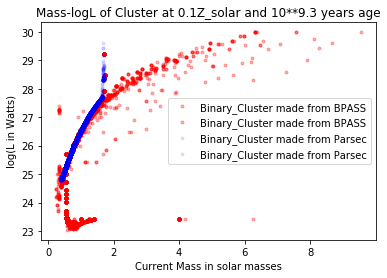

In [50]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS", alpha =0.3)
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS", alpha = 0.3)
plt.plot((clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]), "b.", label="Binary_Cluster made from Parsec", alpha =0.1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]), "b.", label="Binary_Cluster made from Parsec", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at 0.1Z_solar and 10**9.3 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Where is that hook coming from?

In [51]:
np.unique(iso1.primaries[np.where(np.log10(iso1.primaries["L"])<=25)]['phase'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


101.0
110.0


In [52]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"])<=25) & (iso1.primaries["phase"]==110))])

398

In [53]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"])<=25) & (iso1.primaries["phase"]==101))])

1807

OK. It makes sense that our compact remnants are causing this. (Remember, there really is no significant fusion in the insides of neutron stars or white dwarves.

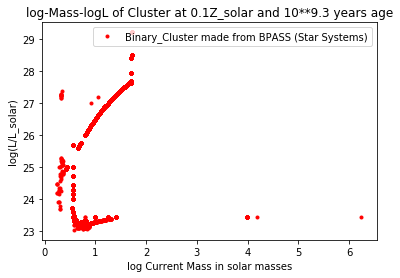

In [54]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS (Star Systems)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**9.3 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

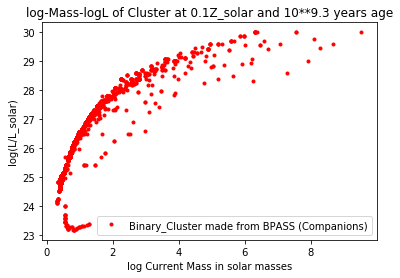

In [55]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.companions['mass_current'], np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS (Companions)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**9.3 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Now go back to the shape of the clusters' Color magnitude diagrams.

In [56]:
np.unique(clus_1.companions['log_a'])

-4.279190550493627
-3.216918572580126
-2.361808652533947
-2.3562247284598223
-2.242646178610905
-2.1671404434945276
-2.1597489313932035
-2.0364261473796614
-1.9234667912053687
-1.9006328351250628
-1.8686056868707412


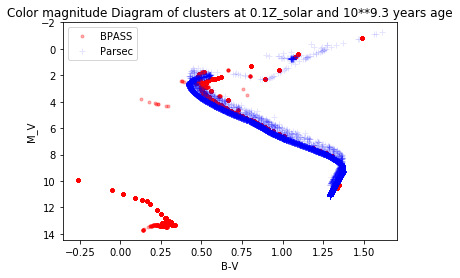

In [57]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B']-clus_1.star_systems["m_ubv_V"], clus_1.star_systems["m_ubv_V"]-5*np.log10(100), "r.",label="BPASS", alpha =0.3)
plt.plot(clus_2.star_systems['m_ubv_B']-clus_2.star_systems["m_ubv_V"], clus_2.star_systems["m_ubv_V"]-5*np.log10(100), "b+", label="Parsec", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at 0.1Z_solar and 10**9.3 years age")
plt.gca().invert_yaxis()
plt.legend()

In [58]:
clus_1.star_systems[np.where(clus_1.star_systems["m_ubv_V"]==0)]

mass,systemMass,Teff,L,logg,isWR,mass_current,phase,metallicity,isMultiple,merged,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,K,W,,,solMass,,,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64


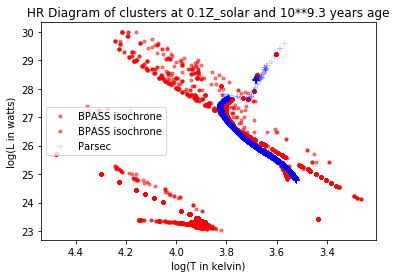

In [59]:
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]), "r.",label="BPASS isochrone", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']), np.log10(clus_2.companions["L"]), "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']), np.log10(clus_1.star_systems["L"]), "r.",label="BPASS isochrone", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']), np.log10(clus_2.star_systems["L"]), "b+", label="Parsec", alpha=0.15)
plt.xlabel("log(T in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("HR Diagram of clusters at 0.1Z_solar and 10**9.3 years age")
plt.gca().invert_xaxis()
plt.legend()

If I look at the HR Diagram, I do see deviation with respects to the Parsec line for some of the brighter stars, but I see an overall good trend with the main-sequence turnoff. Also, I see the compact remnants where they should be given my setup.

Looking at which stars are the white dwarves?

In [60]:
import numpy as np
np.where(clus_1.star_systems['phase']==101.0)[0]

array([   10,    11,    12, ..., 24459, 24468, 24476])

Black Holes?

In [61]:
np.where(clus_1.star_systems['phase']==103.0)[0]

array([], dtype=int64)

In [62]:
np.where(clus_1.star_systems['phase']==102.0)[0]

array([], dtype=int64)

In [63]:
clus_1.star_systems['systemMass'].sum()

23846.069073435632